In [ ]:
#Model Training
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch

In [ ]:
X,y=datasets.make_blobs(n_samples=10000,centers=[[-50,0],[50,0]],cluster_std=15);
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
X_train=torch.from_numpy(X_train.astype(np.float32))
Y_train=torch.from_numpy(Y_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
Y_test=torch.from_numpy(Y_test.astype(np.float32))
Y_train=Y_train.view(Y_train.shape[0],1)
Y_test=Y_test.view(Y_test.shape[0],1)

In [ ]:
class NeuralNetworkModel(torch.nn.Module):
 def __init__(self):
   super(NeuralNetworkModel,self).__init__()
   self.layer1=torch.nn.Linear(2,5);
   self.layer2=torch.nn.Linear(5,5);
   self.layer3=torch.nn.Linear(5,1);
 def forward(self,x):
   y_hat=torch.sigmoid(self.layer1(x))
   y_hat=torch.sigmoid(self.layer2(y_hat))
   y_hat=torch.sigmoid(self.layer3(y_hat))
   return y_hat
 def func(self,x):
   t=torch.sigmoid(self.layer1(x))
   t=torch.sigmoid(self.layer2(t))
   t=self.layer3(t)
   return t;

In [ ]:
def plotmodel(modelt,Xt,Yt):
  x_min, x_max = Xt[:, 0].min() - 1, Xt[:, 0].max() + 1
  y_min, y_max = Xt[:, 1].min() - 1, Xt[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
  fig, ax = plt.subplots()
  Z = modelt(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
  Z = Z>0.5;
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
  ax.scatter(Xt[:, 0], Xt[:, 1], c=Yt)

In [ ]:
def model_plot1(model,X,y,title,x1_hist,x2_hist):  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
    Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
    Z = Z>0.5;
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap='jet')
    plt.scatter(x1_hist,x2_hist,c='y',cmap='jet')
    plt.plot(x1_hist,x2_hist)
    plt.title(title)
    plt.show()

In [ ]:
model=NeuralNetworkModel()
criterion=torch.nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [ ]:
number_of_epochs=4000
for epoch in range(number_of_epochs):
 y_prediction=model(X_train)
 loss=criterion(y_prediction,Y_train)
 loss.backward()
 optimizer.step()
 optimizer.zero_grad()
 if (epoch+1)%1000 == 0:
   print('epoch:', epoch+1,',loss=',loss.item())

epoch: 1000 ,loss= 0.588392436504364
epoch: 2000 ,loss= 0.32213065028190613
epoch: 3000 ,loss= 0.14817069470882416
epoch: 4000 ,loss= 0.08168701827526093


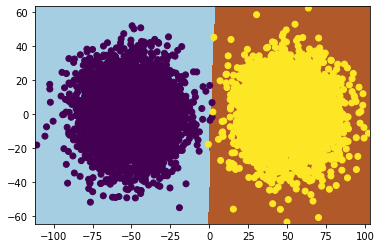

In [ ]:
plotmodel(model,X,y)

In [ ]:
#Data Point Extraction Near Boundary

In [ ]:
extracted_x=[]
loss_h=[]
extracted_y=[]
j=0
k=0
while j<1000:
  k+=1
  x0=torch.mul(torch.rand(1,2),30)
  x0.requires_grad=True
  optimizer=torch.optim.SGD([x0],lr=0.1)
  for i in range(1000):
      optimizer.zero_grad();
      loss=model.func(x0);
      loss.backward();
      optimizer.step();
      if(model(x0)<0.5):
        break;
  if(model(x0)<0.5):
     extracted_x.append(x0[0]);
     extracted_y.append(torch.Tensor([0]))
     loss_h.append(model(x0))
     j+=1
j=0
k=0
while j<1000:
  k+=1
  x0=torch.rand((1,2))
  x0=torch.mul(x0,-30)
  x0.requires_grad=True
  optimizer=torch.optim.SGD([x0],lr=0.1,momentum=0)
  for i in range(1000):
      optimizer.zero_grad();
      loss=-model.func(x0);
      loss.backward();
      optimizer.step();
      if(model(x0)>0.5):
        break;
  if(model(x0)>0.5):
     extracted_x.append(x0[0]);
     extracted_y.append(torch.Tensor([1]))
     loss_h.append(model(x0))
     j+=1
extracted_x=torch.stack(extracted_x)
extracted_y=torch.stack(extracted_y)
torch.save(extracted_x,'extracted_x.pt')
torch.save(extracted_y,'extracted_y.pt')

In [ ]:
torch.save(model,'model.pth')

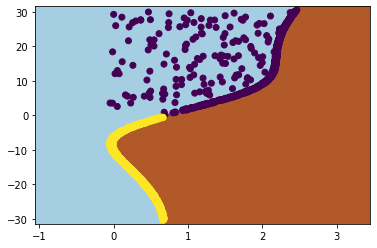

In [ ]:
plotmodel(model,extracted_x.detach().numpy(),extracted_y.detach().numpy())

In [ ]:
extracted_x=extracted_x.detach()
extracted_y=extracted_y.detach()

In [ ]:
extracted_model=NeuralNetworkModel()
crit=torch.nn.BCELoss()
opt=torch.optim.SGD(extracted_model.parameters(),lr=0.01)

In [ ]:
number_of_epochs=1000
for epoch in range(number_of_epochs):
 y_prediction=extracted_model(extracted_x)
 loss=crit(y_prediction,extracted_y)
 loss.backward()
 opt.step()
 opt.zero_grad()
 if (epoch+1)%1000 == 0:
   print('epoch:', epoch+1,',loss=',loss.item())

epoch: 1000 ,loss= 0.10401841998100281


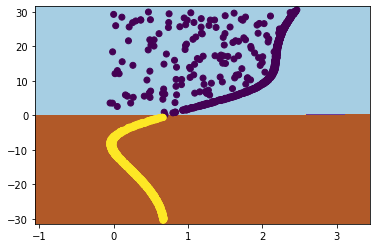

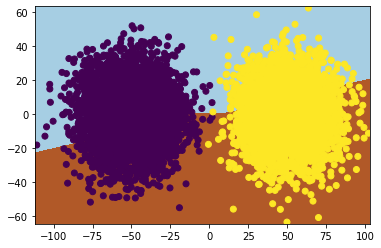

In [ ]:
plotmodel(extracted_model,extracted_x.detach().numpy(),extracted_y.detach().numpy())
plotmodel(extracted_model,X,y)

In [ ]:
Y_pred_ext=extracted_model(X_train)>0.5
accuracy=torch.sum(Y_pred_ext==Y_train)/Y_pred_ext.size()[0]
print(accuracy*100,"%")

tensor(73.1625) %


In [ ]:
extracted_x_far=[]
loss_h=[]
extracted_y_far=[]
j=0
k=0
while j<1000:
  k+=1
  x0=torch.mul(torch.rand(1,2),30)
  x0.requires_grad=True
  optimizer=torch.optim.SGD([x0],lr=0.1)
  for i in range(2000):
      optimizer.zero_grad();
      loss=model.func(x0);
      loss.backward();
      optimizer.step();
  if(model(x0)<0.4):
     extracted_x_far.append(x0[0]);
     extracted_y_far.append(torch.Tensor([0]))
     loss_h.append(model(x0))
     j+=1
j=0
k=0
while j<1000:
  k+=1
  x0=torch.rand((1,2))
  x0=torch.mul(x0,-30)
  x0.requires_grad=True
  optimizer=torch.optim.SGD([x0],lr=0.1,momentum=0)
  for i in range(2000):
      optimizer.zero_grad();
      loss=-model.func(x0);
      loss.backward();
      optimizer.step();
  if(model(x0)>0.6):
     extracted_x_far.append(x0[0]);
     extracted_y_far.append(torch.Tensor([1]))
     loss_h.append(model(x0))
     j+=1
extracted_x_far=torch.stack(extracted_x_far)
extracted_y_far=torch.stack(extracted_y_far)
torch.save(extracted_x_far,'extracted_x_far.pt')
torch.save(extracted_y_far,'extracted_y_far.pt')

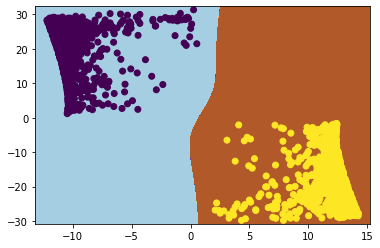

In [ ]:
plotmodel(model,extracted_x_far.detach().numpy(),extracted_y_far.detach().numpy())

In [ ]:
extracted_x_far=extracted_x_far.detach()
extracted_y_far=extracted_y_far.detach()

In [ ]:
extracted_model_far=NeuralNetworkModel()
crit=torch.nn.BCELoss()
opt=torch.optim.SGD(extracted_model_far.parameters(),lr=0.01)

In [ ]:
number_of_epochs=3000
for epoch in range(number_of_epochs):
 y_prediction=extracted_model_far(extracted_x_far)
 loss=crit(y_prediction,extracted_y_far)
 loss.backward()
 opt.step()
 opt.zero_grad()
 if (epoch+1)%1000 == 0:
   print('epoch:', epoch+1,',loss=',loss.item())

epoch: 1000 ,loss= 0.28214654326438904
epoch: 2000 ,loss= 0.1320112943649292
epoch: 3000 ,loss= 0.07628827542066574


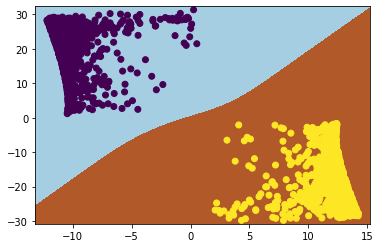

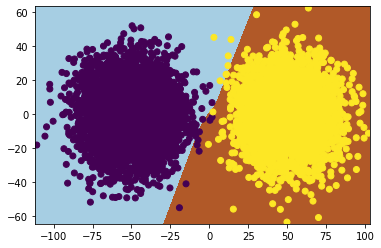

In [ ]:
plotmodel(extracted_model_far,extracted_x_far.detach().numpy(),extracted_y_far.detach().numpy())
plotmodel(extracted_model_far,X,y)

In [ ]:
Y_pred_ext=extracted_model_far(X_train)>0.5
accuracy=torch.sum(Y_pred_ext==Y_train)/Y_pred_ext.size()[0]
print(accuracy*100,"%")

tensor(99.8500) %
